# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Data Science Portfolio/Amazon Echo Sentiment Analysis

/content/drive/MyDrive/Data Science Portfolio/Amazon Echo Sentiment Analysis


# Load Data

In [ ]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [ ]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# EDA

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
# mean review is 4.4, feedback is almost 1
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
# check "verified_reviews" column
reviews_df["verified_reviews"]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

<Axes: >

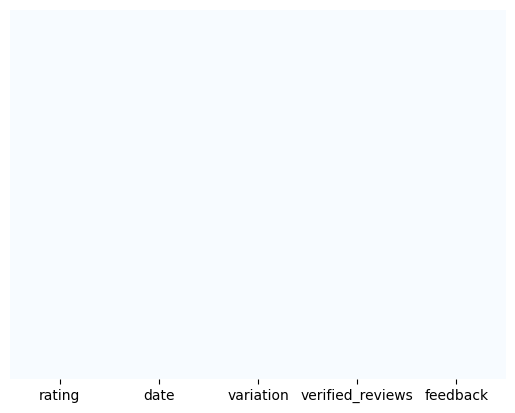

In [ ]:
# check null values
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

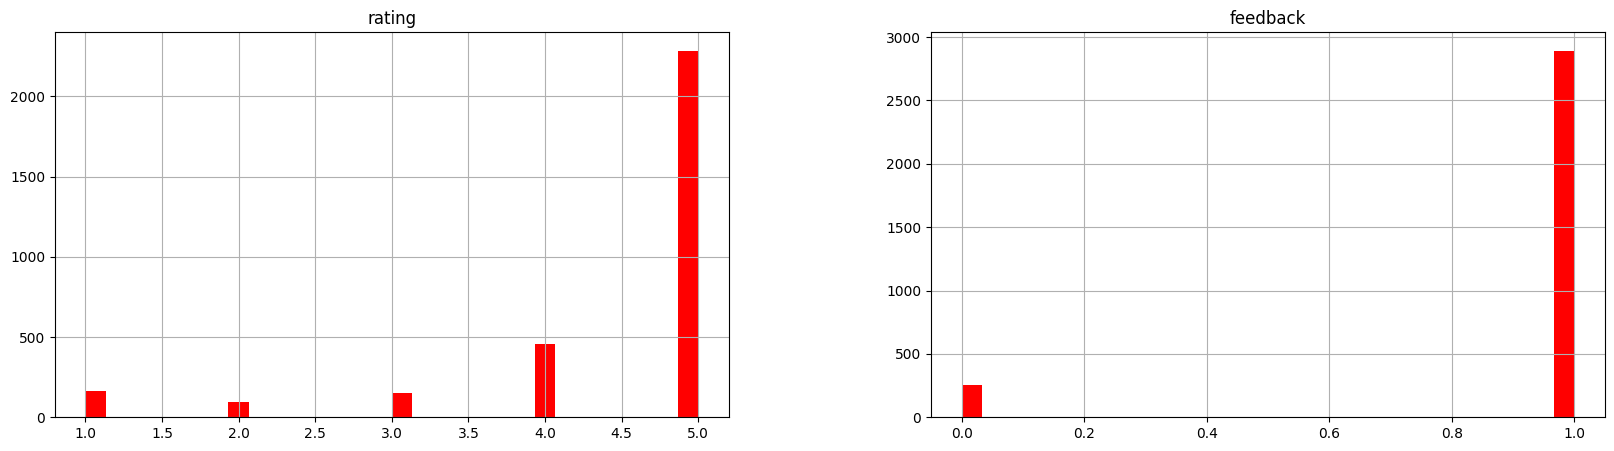

In [ ]:
# distribution of 'rating' & 'feedback' columns
reviews_df.hist(bins = 30, figsize = (20,5), color = 'r')

In [ ]:
# create column with length of reviews
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [ ]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: >

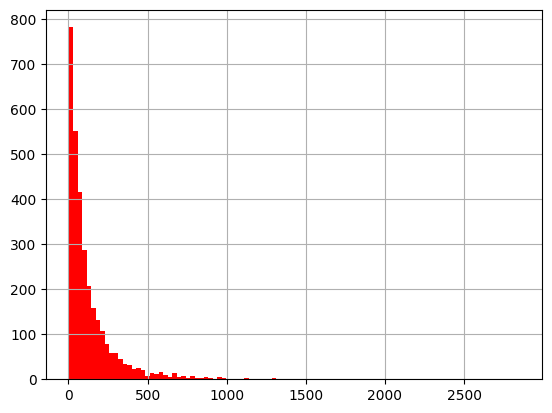

In [ ]:
# distribution of 'length' column
reviews_df['length'].hist(bins = 100, color = 'r')

In [ ]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [ ]:
# check the longest review
reviews_df.loc[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [ ]:
# check the shortest review
reviews_df.loc[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [ ]:
# create 'positive' dataframe
positive = reviews_df[reviews_df['feedback'] == 1]

In [ ]:
# create 'negative' dataframe
negative = reviews_df[reviews_df['feedback'] == 0]

<Axes: xlabel='rating', ylabel='count'>

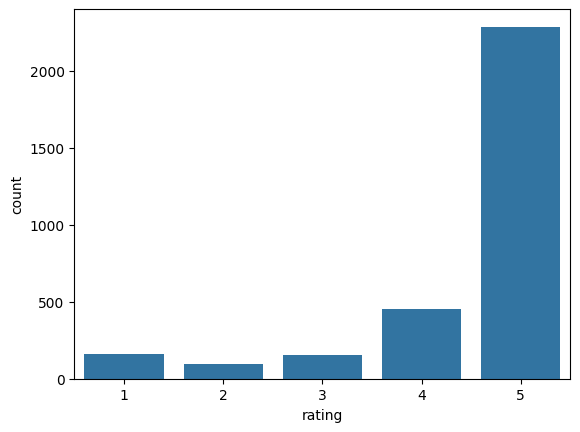

In [ ]:
# rate distribution
sns.countplot(x = 'rating', data = reviews_df)

<ipython-input-373-d683569a29bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

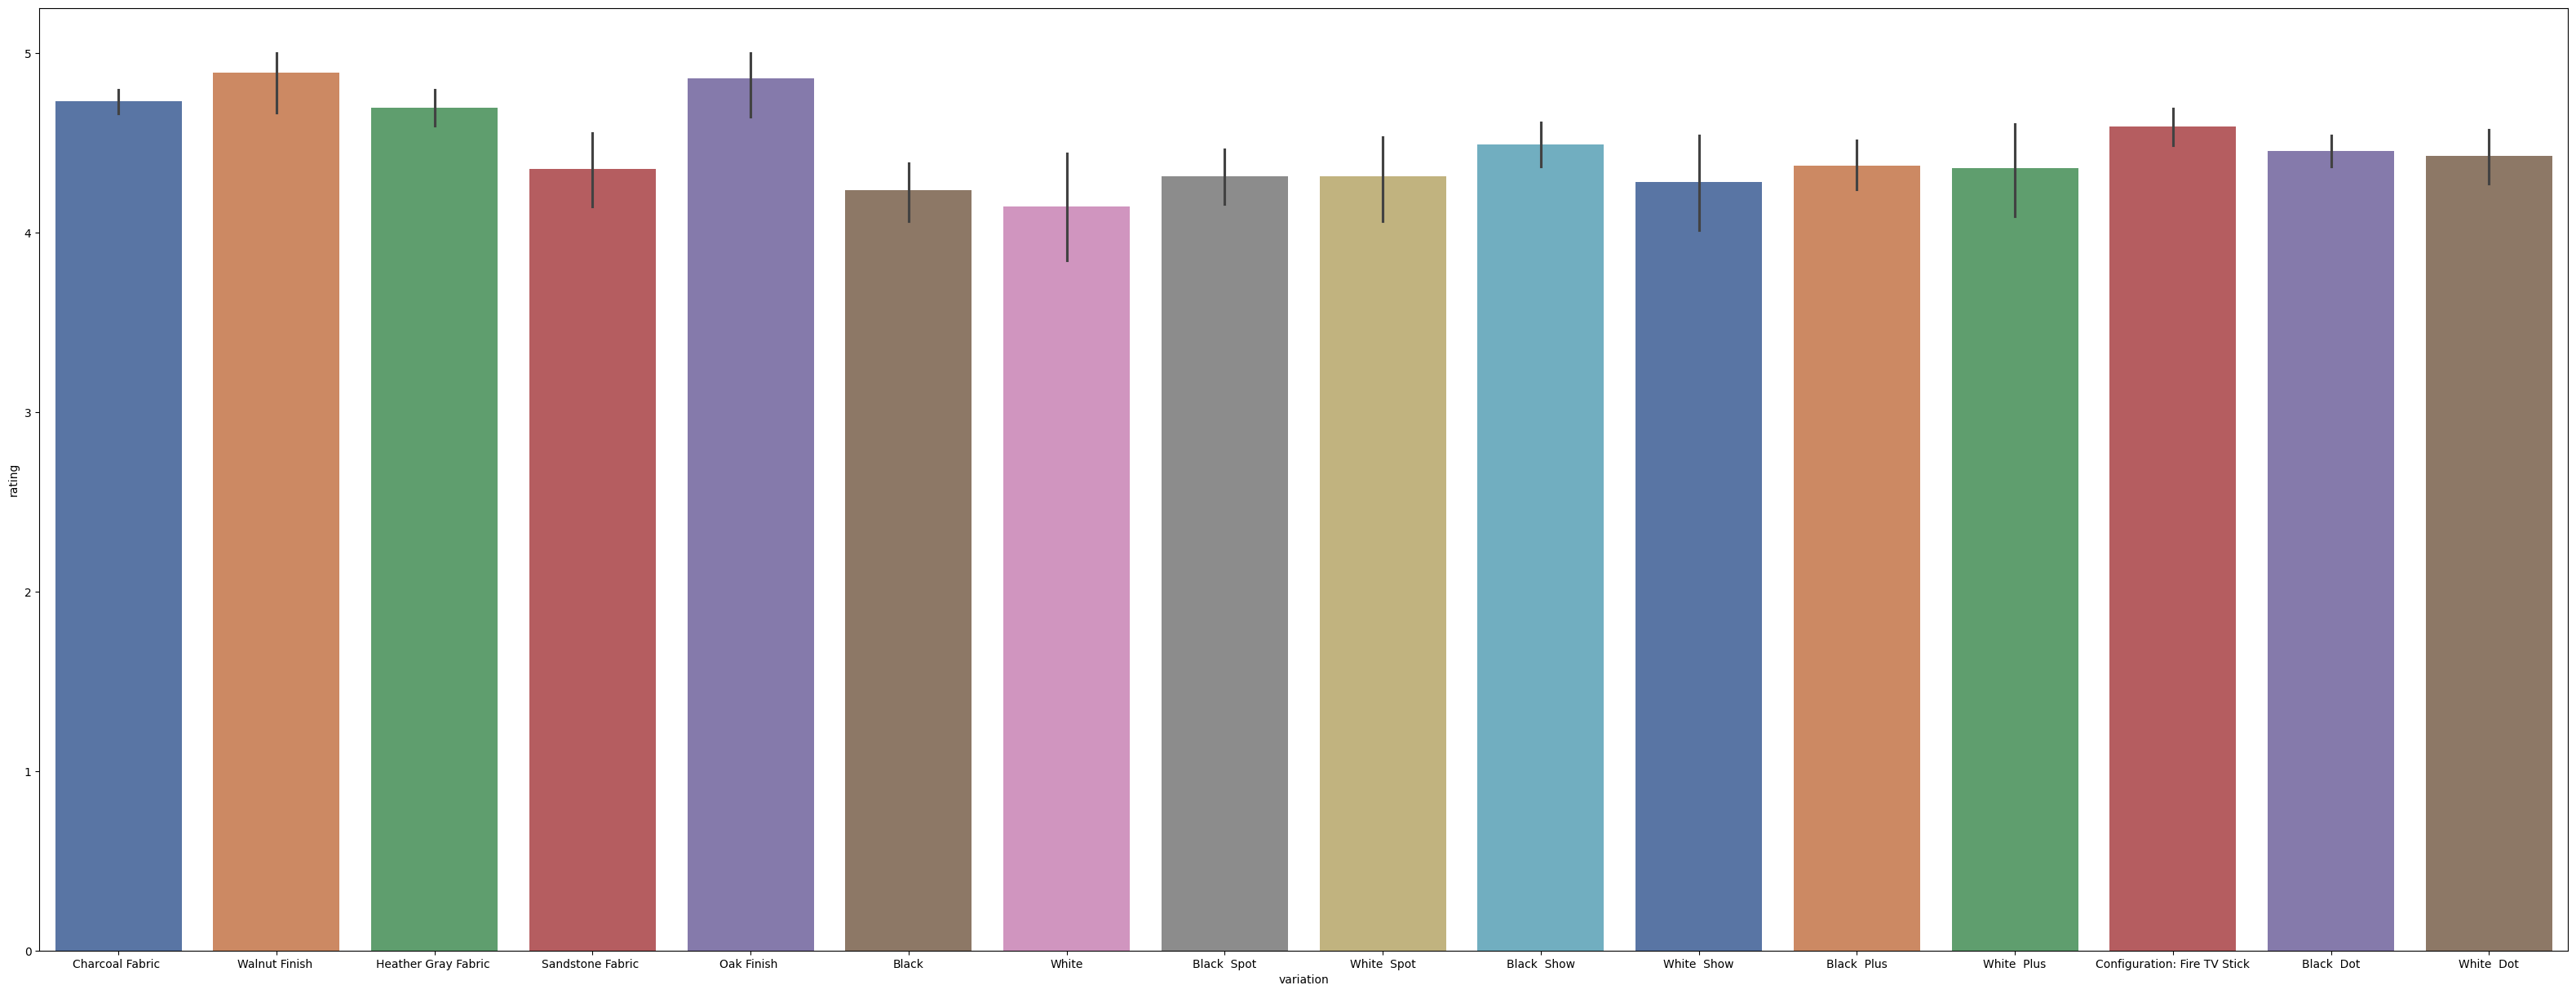

In [ ]:
# varaiton distribution
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')

In [ ]:
# check 'verified_reviews' columns
sentences = reviews_df['verified_reviews'].to_list()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [ ]:
sentences_as_one_string = ''.join(sentences)

In [ ]:
sentences_as_one_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

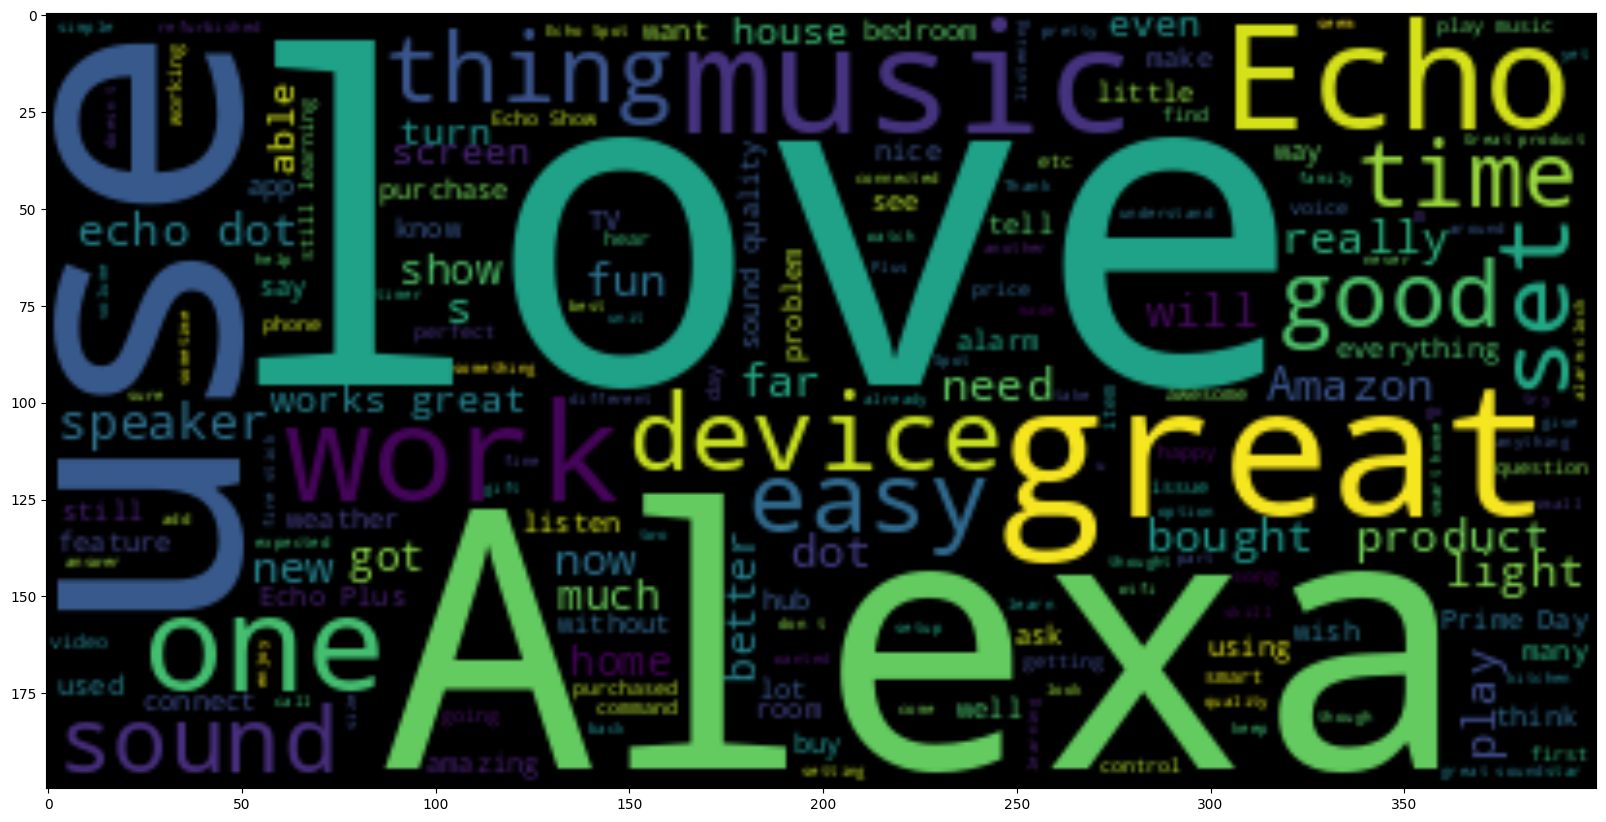

In [ ]:
# word cloud visualization of verified reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string), interpolation = 'bilinear')

In [ ]:
negative_list = negative['verified_reviews'].to_list()

In [ ]:
negative_sentences_as_one_string = ''.join(negative_list)

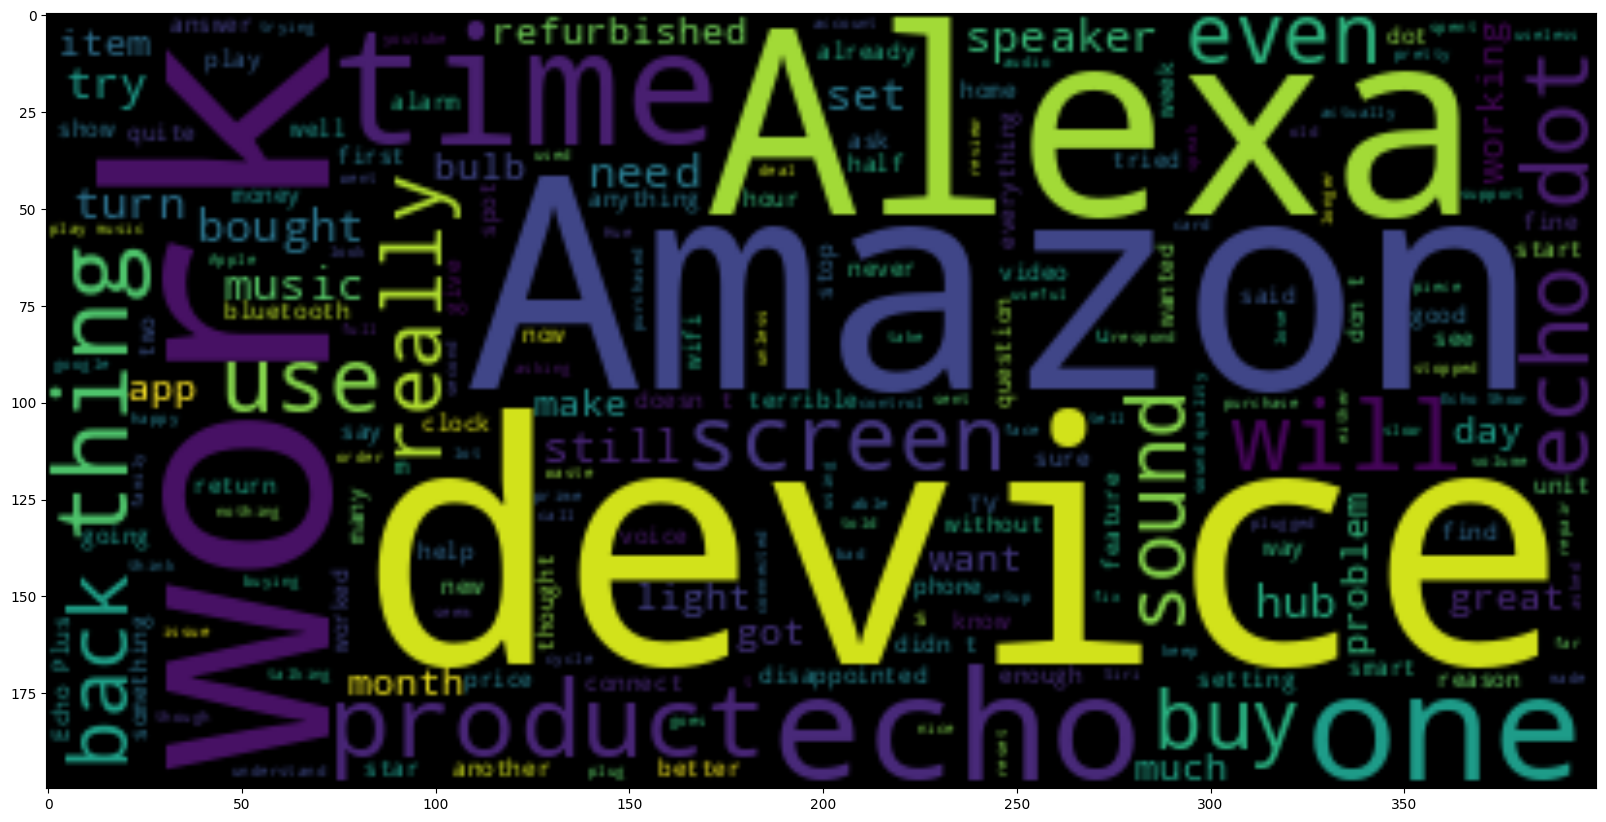

In [ ]:
# word cloud visualization of negative verified reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string), interpolation = 'bilinear')

# Data Cleaning

In [ ]:
# drop 'date', 'length', 'rating' columns
reviews_df.drop(['date', 'length', 'rating' ], axis = 1, inplace = True)

In [ ]:
# convert 'variation' column to categorical
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)

In [ ]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# drop old 'variation'
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [ ]:
# add the encoded column again
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [ ]:
reviews_df.head(5)

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Remove Punctuation & Stop Words

In [ ]:
# create function to remove punctuation and stop words
def message_cleaning(message):
  punc_removed = [char for char in message if char not in string.punctuation]
  punc_removed_join = ''.join(punc_removed)
  punc_removed_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return punc_removed_clean

In [ ]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [ ]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [ ]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# create reviews dataframe
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
# drop 'verified_reviews' column
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [ ]:
# concatenate reviews_df with reviews
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [ ]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apply Naive Bayes Classification Model

In [ ]:
X = reviews_df.drop(['feedback'], axis = 1)
y = reviews_df['feedback']

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
print(X.shape, y.shape)

(3150, 5226) (3150,)


In [ ]:
# train and split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [ ]:
# multinomial naive bayes model training
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

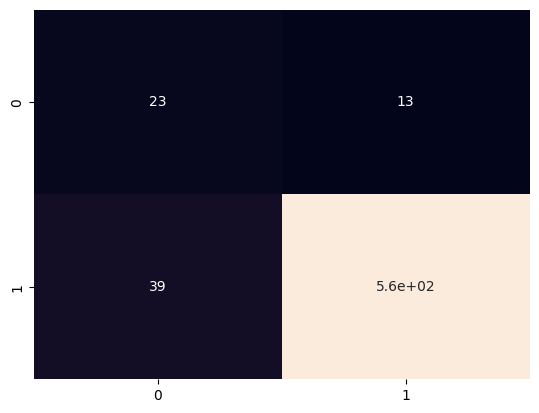

In [ ]:
# confusion matrix heatmap for model evaluation
y_pred_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_pred_test, y_test )
sns.heatmap(cm, annot = True, cbar = False)

In [ ]:
# classification report
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.37      0.64      0.47        36
           1       0.98      0.93      0.96       594

    accuracy                           0.92       630
   macro avg       0.67      0.79      0.71       630
weighted avg       0.94      0.92      0.93       630



#Apply Logistec Regression Classifier Model

In [ ]:
# logistic regression model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<Axes: >

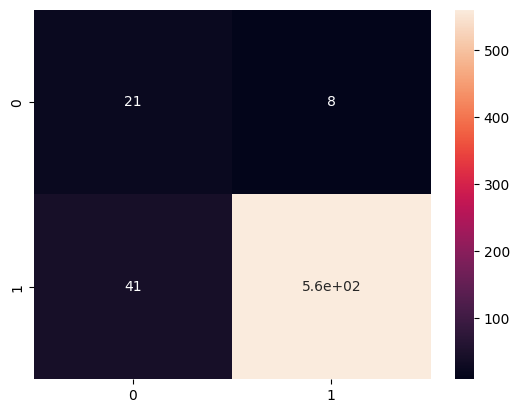

In [ ]:
# confusion matrix heatmap for model evaluation
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
# model accuracy score
print(f'Accuracy {accuracy_score(y_pred, y_test)}')

Accuracy 0.9222222222222223


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.34      0.46        62
           1       0.93      0.99      0.96       568

    accuracy                           0.92       630
   macro avg       0.83      0.66      0.71       630
weighted avg       0.91      0.92      0.91       630

